In [1]:
from bs4 import BeautifulSoup
import datetime
import time
import re
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

driver_path = '/usr/local/bin/chromedriver'
chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.binary_location = '/Applications/Brave Browser.app/Contents/MacOS/Brave Browser'
driver = webdriver.Chrome(options = chrome_options, executable_path = driver_path)
driver2 = webdriver.Chrome(options = chrome_options, executable_path = driver_path)


In [1]:
from bs4 import BeautifulSoup
import datetime
import time
import re
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

driver_path = '/usr/local/bin/chromedriver'
chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.binary_location = '/Applications/Brave Browser.app/Contents/MacOS/Brave Browser'
driver = webdriver.Chrome(options = chrome_options, executable_path = driver_path)
driver2 = webdriver.Chrome(options = chrome_options, executable_path = driver_path)



results = {}
names = []
phone_numbers = []
emails = []

def get_data(cities):
    for city in cities:
        results[city] = []
        driver.get(f'https://google.com/search?q=countertop contractors {city}')
        view_all = driver.find_element_by_class_name('wUrVib')
        view_all.click()
        for i in range(2):
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            item_list = soup.find('div', attrs={'class': 'rlfl__tls rl_tls'})
            items = item_list.find_all('div', attrs={'class': 'VkpGBb'})
            for item in items:
                name = item.find('div', {'class':'dbg0pd'}).text
                name = name.strip('Why this ad?')
                phone_block = item.find('span', attrs={'class': 'rllt__details lqhpac'})
                phone_number = re.search(('\(?\d{3}\)?[-\.]? *\d{3}[-\.]? *[-\.]?\d{4}'), str(phone_block))
                if phone_number == None:
                    phone_number == 'N/A'
                else:
                    phone_number = phone_number.group()
                    
                try:
                    driver2.get(f'https://google.com/search?q={name} {city}')
                    website = driver2.find_element_by_class_name('rc')
                    website.click()
                    time.sleep(3)
                    email = re.search("([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.(?:com|org|net|me|net)+)", driver2.page_source)
                except:
                    pass
               
                if email == None:
                    try:
                        contact = driver2.find_element_by_xpath("//*[contains(text(), 'Contact')]")
                        contact.click()
                        email = re.search("([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.(?:com|org|net|me|net)+)", driver2.page_source)
                        email = email.group()
                    except:
                        email = 'N/A'
                else:
                    if type(email) != str:
                        email = email.group()



                names.append(name)
                phone_numbers.append(phone_number)
                emails.append(email)
                results[city].append({name:[{'phone_number': phone_number}, {'email': email}]})

            try:
                next_ = driver.find_element_by_id('pnnext')
                next_.click()
                time.sleep(3)
            except:
                pass
            
    result_df = pd.DataFrame(zip(names, phone_numbers, emails), 
                             columns = ['Company Name', 'Phone Number', 'Email'])
    result_df.to_csv(f'Countertop_Contractors_data.csv')
    
    return results

    
if __name__ == "__main__":
    cities = ['Naples', 'New York']
    get_data(cities)

In [12]:
a = ['1','2','3','4']
b = ['a', 'b', 'c', 'd']
c = ['adsf', 'adsf', 'adsfj', 'adsfads']
data = {'Email': a, 'Phomne': b, 'name': c}
colums = ['One', 'two', 'three']

test = pd.DataFrame(zip(a,b,c), columns = colums)

In [13]:
test

,One,two,three
0,1,a,adsf
1,2,b,adsf
2,3,c,adsfj
3,4,d,adsfads


In [8]:
from bs4 import BeautifulSoup

from selenium import webdriver
from selenium.webdriver.chrome.options import Options


driver_path = '/usr/local/bin/chromedriver'
chrome_options = Options()
#chrome_options.add_argument('--headless')
chrome_options.binary_location = '/Applications/Brave Browser.app/Contents/MacOS/Brave Browser'
driver = webdriver.Chrome(options = chrome_options, executable_path = driver_path)
#driver2 = webdriver.Chrome(options = chrome_options, executable_path = driver_path)

name = 'countertop contractors'
cities = ['Naples', 'New York', 'Dallas', 'Las Vegas']
for city in cities:
    driver.get(f'https://google.com/search?q=countop contractors {city}')
    view_all = driver.find_element_by_class_name('wUrVib')
    view_all.click()
    for i in range(4):
        next_ = driver.find_element_by_id('pnnext')
        next_.click()
        time.sleep(2)
    
    
    #site = driver.find_element_by_class_name('rc')
    #site.click()
    

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"[id="pnnext"]"}
  (Session info: chrome=86.0.4240.75)


In [ ]:
//*[@id="rl_ist0"]/div[2]/div/table/tbody/tr/td[8]

In [ ]:
//*[@id="rl_ist0"]/div[2]/div/table/tbody/tr/td[6]

<div class="rlfl__tls rl_tls" jsaction="rcuQ6b:npT2md" jscontroller="wpqMqd">
 <div>
  <div data-hveid="58" data-jsdata="" jsaction="rcuQ6b:npT2md" jscontroller="o5YE5d" jsdata="zt2wNd;;CnlLVs" jsname="GZq3Ke">
   <div class="wYWDAd">
   </div>
   <div class="rllt__mi" data-id="17151897754515484532" data-lat="26.225559999999998" data-lng="-81.781002" style="display:none">
    <div>
     <div class="klhover" data-ved="0ahUKEwiT4MrB1afsAhUIwVkKHWImDNwQ6IMCCDs">
     </div>
     <div class="vzRMeAg4Oi8__kltc kltooltip" data-ved="0ahUKEwiT4MrB1afsAhUIwVkKHWImDNwQlK4BCDw">
      <div class="vzRMeAg4Oi8__kl-name-mask">
       <div class="vzRMeAg4Oi8__kl-trunc-name">
        Artisan Building and Development Inc.
       </div>
      </div>
      <div class="vzRMeAg4Oi8__ad-badge">
       <span class="vzRMeAg4Oi8__ads-badge">
        <span>
         Ad
        </span>
        <span style="padding:0 5px">
         ·
        </span>
       </span>
      </div>
      <div class="vzRMeAg4Oi8__kl-re
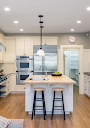
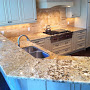
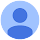
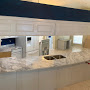
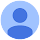
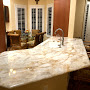
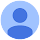
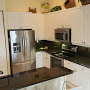
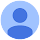
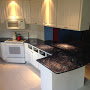
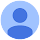
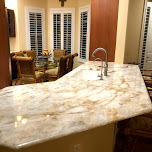
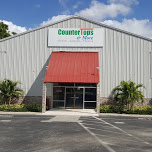
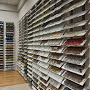
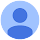
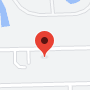
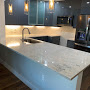
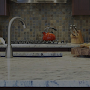
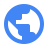
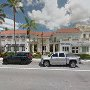
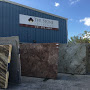
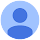
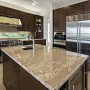
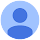
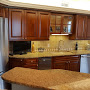
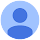
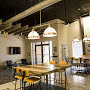
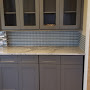
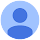
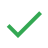
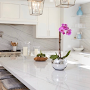
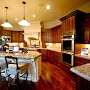
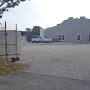
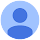
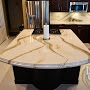
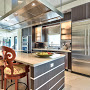

In [11]:
view_all = driver.find_element_by_class_name('wUrVib')
view_all.click()
soup = BeautifulSoup(driver.page_source, 'html.parser')
items = soup.find('div', attrs={'class': 'rlfl__tls rl_tls'})
print(items.prettify())

In [6]:
things = ['ekrtje', 'adhsfkj', 'ahsdf']

for i , j in zip(things, range(1,10)):
    print(j)


1
2
3


In [ ]:
//*[@id="rl_ist0"]/div[1]/div[4]/div[20]/div/div[2]/div/a/div/div[2]/div